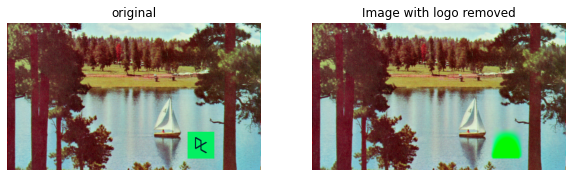

In [1]:
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

plt.rcParams['figure.figsize'] = (10, 8)

def show_image(image, title='Image', cmap_types='gray'):
    plt.imshow( image, cmap=cmap_type)
    pit.title(title)
    plt.axis('off')

def plot_comparison(img_original, img_filtered, img_title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)
    ax1.imshow(img_original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(img_filtered, cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')

from skimage.restoration import inpaint
from skimage.transform import resize
from skimage import color

image_with_logo = plt.imread('logo.png')

# Initialize the mask
mask = np.zeros(image_with_logo.shape[:-1])

 

# Set the pixels where the Logo is to 2
mask[210:272, 360:425] = 1

# Aoply inpainting to remove the Logo

image_logo_removed = inpaint.inpaint_biharmonic(image_with_logo,
                                                mask,
                                                multichannel=True)

# show the original and Logo removed imoges
plot_comparison(image_with_logo, image_logo_removed, 'Image with logo removed')


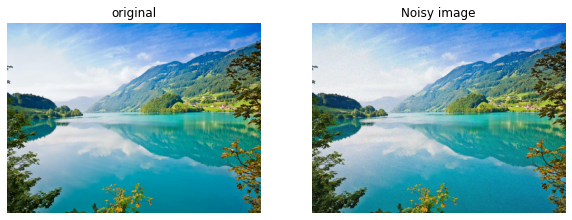

In [2]:
from skimage.util import random_noise
import matplotlib.pyplot as plt
fruit_image = plt.imread('nature.jpg')
noisy_image = random_noise(fruit_image)
plot_comparison(fruit_image, noisy_image, 'Noisy image')

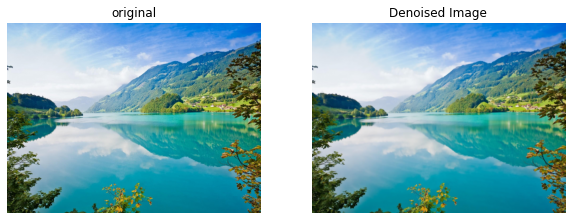

In [3]:
from skimage.restoration import denoise_tv_chambolle
noisy_image = plt.imread('nature.jpg')
denoised_image = denoise_tv_chambolle(noisy_image, multichannel=True)
plot_comparison(noisy_image, denoised_image, 'Denoised Image')

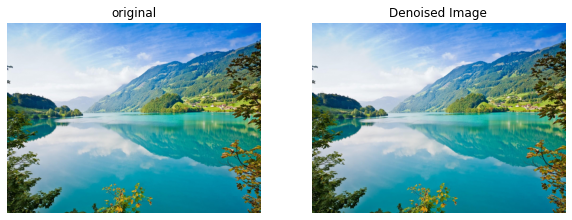

In [4]:
from skimage.restoration import denoise_bilateral
landscape_image = plt.imread('nature.jpg')
denoised_image = denoise_bilateral(landscape_image, multichannel=True)
plot_comparison(landscape_image, denoised_image, 'Denoised Image')

C:\Users\User\AppData\Local\Temp/ipykernel_920/2723801851.py:7: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments=slic(img,n_segments=400, compactness=20)
C:\Users\User\AppData\Local\Temp/ipykernel_920/2723801851.py:10: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  segmented_image=label2rgb(segments,img,kind='avg')


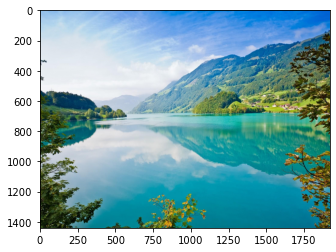

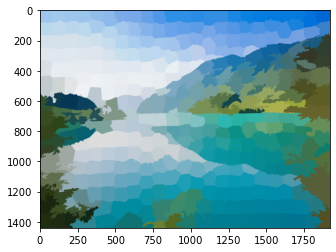

In [3]:
from skimage.segmentation import slic
from skimage.color import label2rgb
import matplotlib.pyplot as plt
img=plt.imread('nature.jpg')

#obtain the segmentation with 400 regions
segments=slic(img,n_segments=400, compactness=20)

#put segments on top of original image to compare
segmented_image=label2rgb(segments,img,kind='avg')

#Show the segmented image
plt.imshow(img.astype('uint8'))
plt.show()
plt.imshow(segmented_image.astype('uint8'))
plt.show()

In [4]:
def show_image_contour(image, contours):
    plt.figure()
    for n, contour in enumerate(contours):
        plt.plot(contour[:, 1], contour[:, 0], linewidth=3)
        plt.imshow(image, interpolation='nearest', cmap='gray_r')
        plt.title('contours')
        plt.axis('off')

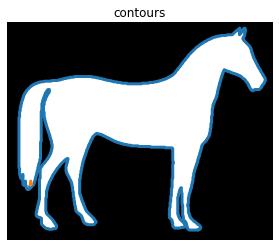

In [5]:
from skimage import measure, data
horse_image = data.horse()
contours = measure.find_contours(horse_image, level=0.8)
show_image_contour(horse_image, contours)

In [5]:
def show_image_contour(image, contours):
    plt.figure()
    for n, contour in enumerate(contours):
        plt.plot(contour[:, 1], contour[:, 0], linewidth=3)
        plt.imshow(image, interpolation='nearest', cmap='gray_r')
        plt.title('contours')
        plt.axis('off')

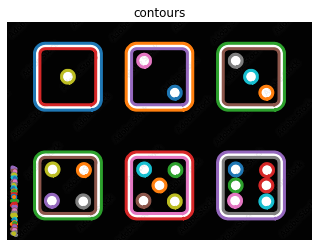

In [17]:
from skimage.io import imread
from skimage.filters import threshold_otsu
from skimage import color 
from skimage import measure
import matplotlib.pyplot as plt
import numpy as np
image_dices=imread('123.jpg')
image_dices=color.rgb2gray(image_dices)
thresh=threshold_otsu(image_dices)
binary=image_dices>thresh
contours=measure.find_contours(binary,level=0.8)
show_image_contour(image_dices,contours)

Dice`s dots number: 23.


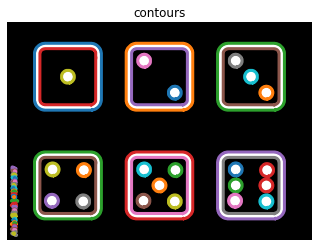

In [26]:
shape_contours = [cnt.shape[0] for cnt in contours]
max_dots_shape =46
dots_contours = [cnt for cnt in contours if np.shape(cnt)[0] < max_dots_shape]
show_image_contour(binary, contours)
print('Dice`s dots number: {}.'.format(len(dots_contours)))